# Chapter 7: Clustering 

## 7.2 How clustering works?

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
customers_df = pd.read_csv( "customers.csv" )

In [4]:
customers_df.head(5)

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

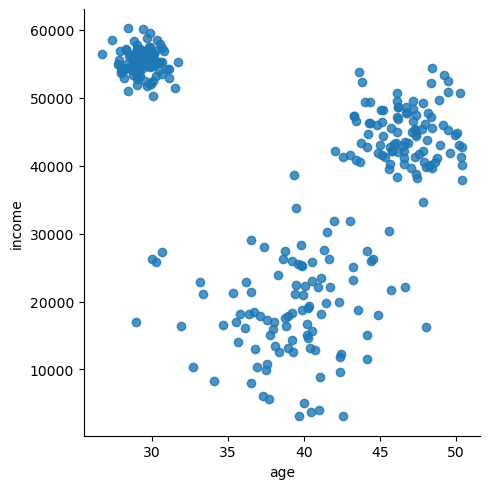

In [6]:
sn.lmplot( x = "age", y = "income", data=customers_df, fit_reg = False );
#plt.title( "Fig 1: Customer Segments Based on Income and Age");

## 7.3 K-means Clustering

In [7]:
from sklearn.cluster import KMeans

clusters = KMeans( 3 )
clusters.fit(customers_df)

KMeans(n_clusters=3)

In [8]:
customers_df["clusterid"] = clusters.labels_

In [9]:
customers_df[0:5]

,income,age,clusterid
0,41100.0,48.75,0
1,54100.0,28.10,2
2,47800.0,46.75,0
3,19100.0,40.25,1
4,18200.0,35.80,1


### 7.3.1 Plotting the customers with their segments

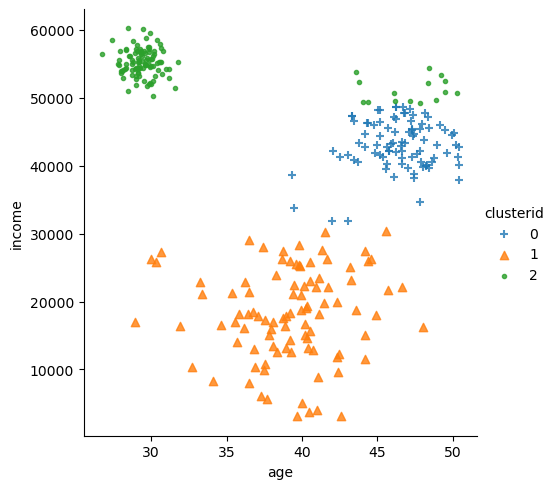

In [10]:
markers = ['+','^','.']

sn.lmplot( x = "age", y = "income", 
          data=customers_df, 
          hue = "clusterid", 
          fit_reg=False, 
          markers = markers );

### 7.3.2 Normalizing the features

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform( 
    customers_df[["age", "income"]] )

scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

In [13]:
from sklearn.cluster import KMeans

clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

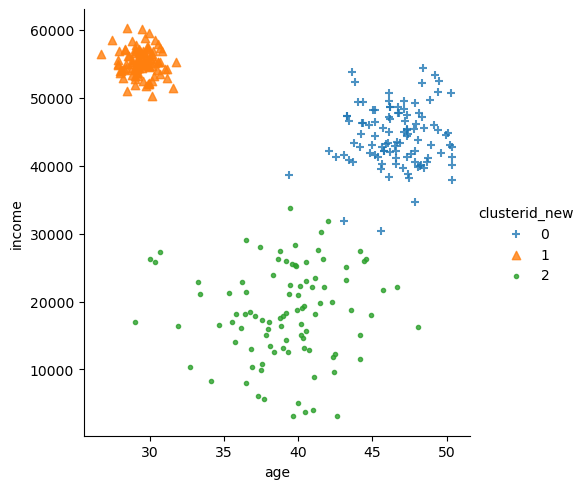

In [14]:
markers = ['+','^','.']

sn.lmplot( x = "age", y = "income", 
          data=customers_df, 
          hue = "clusterid_new", 
          fit_reg=False, 
          markers = markers );

In [15]:
clusters.cluster_centers_

array([[4.30539326e+04, 4.64191011e+01],
       [1.81447917e+04, 3.91744792e+01],
       [5.46756522e+04, 3.17004348e+01]])

### 7.3.3 Cluster Centers and Interpreting the Clusters

In [16]:
customers_df.groupby( 'clusterid' )[['age', 
                            'income']].agg( ["mean", 
                                            'std'] ).reset_index()

clusterid        age                  income             
                  mean       std          mean          std
0         0  46.419101  2.289620  43053.932584  3613.769632
1         1  39.174479  3.626068  18144.791667  6745.241906
2         2  31.700435  6.122122  54675.652174  2362.224320

## 7.4 Creating Product Segments

### 7.4.1 Beer Dataset

In [17]:
beer_df = pd.read_csv( 'beer.csv' )

In [18]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories', 
                                                'sodium', 
                                                'alcohol', 
                                                'cost']] )

### 7.4.2 How many clusters exist?

#### 7.4.2.1 Using Dendrogram

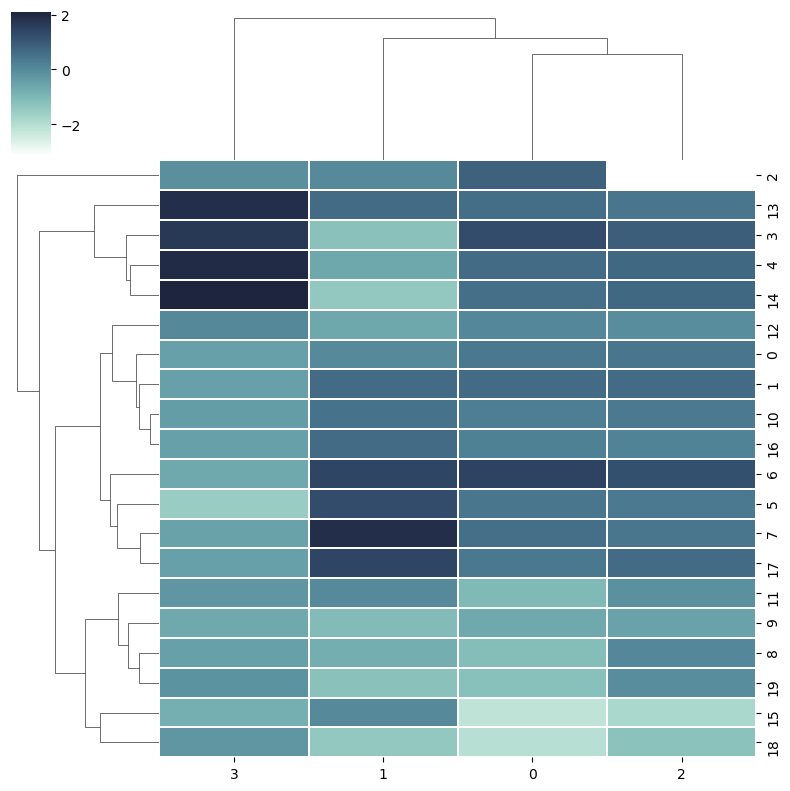

In [20]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2, 
              figsize = (8,8) );
#plt.title( "Fig 4: Dendrogram of Beer Dataset");

In [21]:
beer_df.iloc[[10, 16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [22]:
beer_df.iloc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


### 7.4.2.2 Finding Optimal Number of Clusters using Elbow Method

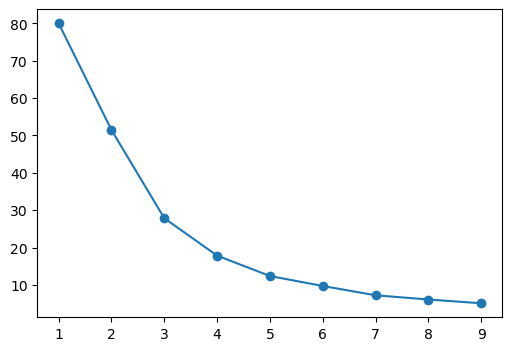

In [23]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );

### 7.4.2.3 Finding Optimal Number of Clusters using Silhouette Score 

In [24]:
#!pip install yellowbrick

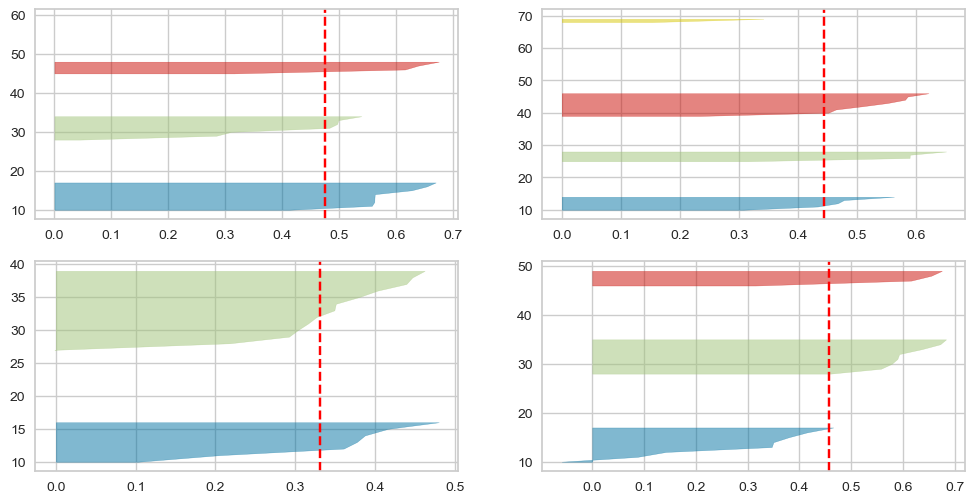

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(12,6))
num_clusters = [2, 3, 4, 5]
for i, k in enumerate(num_clusters):
    km = KMeans(n_clusters=k)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, 
                                      colors='yellowbrick', 
                                      ax=ax[q-1][mod])
    visualizer.fit(scaled_beer_df) 

### 7.4.3 Creating Clusters

#### 7.4.3.1. Rescaling the dataset

In [26]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories', 
                                                'sodium', 
                                                'alcohol', 
                                                'cost']] )

In [27]:
k = 3

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

### 7.4.4 Interpreting the Clusters

#### Cluster 0

In [28]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,0
1,Schlitz,151,19,4.9,0.43,0
5,Old_Milwaukee,145,23,4.6,0.28,0
6,Augsberger,175,24,5.5,0.40,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0
10,Coors,140,18,4.6,0.44,0
16,Hamms,139,19,4.4,0.43,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0


#### Cluster 1

In [29]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
2,Lowenbrau,157,15,0.9,0.48,1
8,Miller_Lite,99,10,4.3,0.43,1
9,Budweiser_Light,113,8,3.7,0.40,1
11,Coors_Light,102,15,4.1,0.46,1
12,Michelob_Light,135,11,4.2,0.50,1
15,Pabst_Extra_Light,68,15,2.3,0.38,1
18,Olympia_Goled_Light,72,6,2.9,0.46,1
19,Schlitz_Light,97,7,4.2,0.47,1


#### Cluster 2

In [30]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


## 7.5 Hierarchical clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
h_clusters = AgglomerativeClustering( 3 )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_

In [33]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,1,0
8,Miller_Lite,99,10,4.3,0.43,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
19,Schlitz_Light,97,7,4.2,0.47,1,0


In [34]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,1
1,Schlitz,151,19,4.9,0.43,0,1
5,Old_Milwaukee,145,23,4.6,0.28,0,1
6,Augsberger,175,24,5.5,0.40,0,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,1
10,Coors,140,18,4.6,0.44,0,1
16,Hamms,139,19,4.4,0.43,0,1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,1


In [35]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2
4,Heineken,152,11,5.0,0.77,2,2
13,Becks,150,19,4.7,0.76,2,2
14,Kirin,149,6,5.0,0.79,2,2


### 7.5.1.2 Linkage Methods in Hierarchical Clustering

In [36]:
h_clusters = AgglomerativeClustering( 3, linkage = 'single' )
h_clusters.fit( scaled_beer_df )
beer_df["h_clusterid"] = h_clusters.labels_
beer_df.sort_values("h_clusterid")

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid
0,Budweiser,144,15,4.7,0.43,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0
12,Michelob_Light,135,11,4.2,0.50,1,0
11,Coors_Light,102,15,4.1,0.46,1,0
10,Coors,140,18,4.6,0.44,0,0
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0
9,Budweiser_Light,113,8,3.7,0.40,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0


## 7.6 Density Based clustering

In [37]:
from sklearn.cluster import HDBSCAN

hdbscan = HDBSCAN(min_cluster_size=2)
hdbscan.fit(scaled_beer_df)

hdbscan.labels_

array([ 2,  2, -1,  0,  0, -1, -1,  3,  1,  1,  2,  1, -1,  0,  0, -1,  2,
        3, -1,  1])

In [38]:
beer_df['hdbscan_clusterid'] = hdbscan.labels_

In [39]:
beer_df[beer_df.hdbscan_clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid,hdbscan_clusterid
3,Kronenbourg,170,7,5.2,0.73,2,2,0
4,Heineken,152,11,5.0,0.77,2,2,0
13,Becks,150,19,4.7,0.76,2,2,0
14,Kirin,149,6,5.0,0.79,2,2,0


In [40]:
beer_df[beer_df.hdbscan_clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid,hdbscan_clusterid
8,Miller_Lite,99,10,4.3,0.43,1,0,1
9,Budweiser_Light,113,8,3.7,0.40,1,0,1
11,Coors_Light,102,15,4.1,0.46,1,0,1
19,Schlitz_Light,97,7,4.2,0.47,1,0,1


In [41]:
beer_df[beer_df.hdbscan_clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid,hdbscan_clusterid
0,Budweiser,144,15,4.7,0.43,0,0,2
1,Schlitz,151,19,4.9,0.43,0,0,2
10,Coors,140,18,4.6,0.44,0,0,2
16,Hamms,139,19,4.4,0.43,0,0,2


In [42]:
beer_df[beer_df.hdbscan_clusterid == 3]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid,hdbscan_clusterid
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,3
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,3


In [43]:
beer_df[beer_df.hdbscan_clusterid == -1]

,name,calories,sodium,alcohol,cost,clusterid,h_clusterid,hdbscan_clusterid
2,Lowenbrau,157,15,0.9,0.48,1,1,-1
5,Old_Milwaukee,145,23,4.6,0.28,0,0,-1
6,Augsberger,175,24,5.5,0.40,0,0,-1
12,Michelob_Light,135,11,4.2,0.50,1,0,-1
15,Pabst_Extra_Light,68,15,2.3,0.38,1,0,-1
18,Olympia_Goled_Light,72,6,2.9,0.46,1,0,-1


## 7.7 Outlier Detection

In [44]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators = 50, 
                             contamination = 0.1, 
                             random_state = 100)
    
iso_forest.fit(scaled_beer_df)

IsolationForest(contamination=0.1, n_estimators=50, random_state=100)

In [45]:
beer_df['anomaly_score'] = iso_forest.decision_function(scaled_beer_df)
beer_df['anomaly'] = iso_forest.predict(scaled_beer_df)

In [46]:
beer_df[['name', 'calories', 'sodium', 'alcohol', 'cost', 'anomaly_score', 'anomaly']]

,name,calories,sodium,alcohol,cost,anomaly_score,anomaly
0,Budweiser,144,15,4.7,0.43,0.208982,1
1,Schlitz,151,19,4.9,0.43,0.190102,1
2,Lowenbrau,157,15,0.9,0.48,-0.006870,-1
3,Kronenbourg,170,7,5.2,0.73,0.005233,1
4,Heineken,152,11,5.0,0.77,0.105002,1
5,Old_Milwaukee,145,23,4.6,0.28,0.081899,1
6,Augsberger,175,24,5.5,0.40,-0.004998,-1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0.127919,1
8,Miller_Lite,99,10,4.3,0.43,0.159993,1
9,Budweiser_Light,113,8,3.7,0.40,0.112505,1


# Dimensionality Reduction

## 7.8.2 Singular Value Decompositions

In [47]:
import numpy as np
import pandas as pd

### Initialize the matrix

In [48]:
mat = np.array([[4, 2, 2], 
                [3, 4, 1],
                [6, 7, 2]])

In [49]:
U, s, Vh = np.linalg.svd(mat, full_matrices=False)

In [50]:
print(U)

[[-0.39238083  0.91021976 -0.13242839]
 [-0.43543486 -0.31063767 -0.84492646]
 [-0.810206   -0.273869    0.51822968]]


In [51]:
print(s)

[11.624865    1.96337343  0.08762725]


In [52]:
print(Vh)

[[-0.66556161 -0.7052076  -0.24435626]
 [ 0.54281675 -0.68208838  0.49000553]
 [ 0.51222819 -0.1934882  -0.83677034]]


### Are the column vectors orthgonal?

In [53]:
dotp = np.round(np.dot(U[:, 0], U[:, 1]), 2)
dotp

0.0

In [54]:
# Check if the vector is a unit vector
is_orthogonal = np.isclose(dotp, 0.0)

print("Are the vectors orthogonal to each other?", is_orthogonal)

Are the vectors orthogonal to each other? True


In [55]:
# Calculate the Euclidean norm
norm = np.linalg.norm(U[:, 0])
norm

0.9999999999999997

### Are the vectors unit vectors?

In [56]:
# Check if the vector is a unit vector
is_unit_vector = np.isclose(norm, 1.0)

print("Is the vector a unit vector?", is_unit_vector)

Is the vector a unit vector? True


In [57]:
norm_A = np.linalg.norm(U[:, 0])
norm_B = np.linalg.norm(U[:, 1])

cosine_similarity = dotp / (norm_A * norm_B)

print("Cosine Similarity:", cosine_similarity)

Cosine Similarity: 0.0


### What happens if the first eigen vectors and values are taken?

In [58]:
mat_1 = U[:, :1] @ np.diag(s[:1]) @ Vh[:1, :]
np.round(mat_1, 1)

array([[3. , 3.2, 1.1],
       [3.4, 3.6, 1.2],
       [6.3, 6.6, 2.3]])

### What happens if the two eigen vectors and values are taken?

In [59]:
mat_2 = U[:, :2] @ np.diag(s[:2]) @ Vh[:2, :]
np.round(mat_2, 1)

array([[4. , 2. , 2. ],
       [3. , 4. , 0.9],
       [6. , 7. , 2. ]])

### What happens if the all eigen vectors and values are taken?

In [60]:
mat_3 = U @ np.diag(s) @ Vh
np.round(mat_3, 1)

array([[4., 2., 2.],
       [3., 4., 1.],
       [6., 7., 2.]])


## 7.8.3 Application of SVD - Image Compression

In [61]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

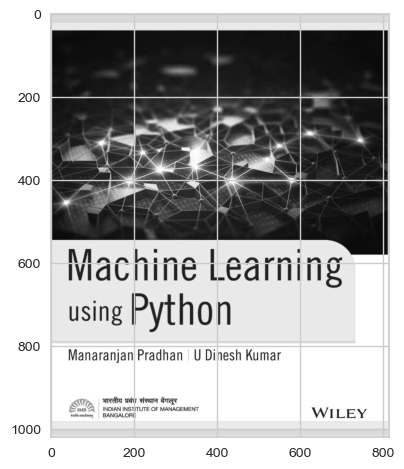

In [62]:
book = Image.open('book.png')
booknp = np.array(book)
grayscale = booknp[:, :, :1]
plt.imshow( grayscale, cmap='gray' );

### SVD of Image Matrix

In [63]:
U_vec, sigma, V_vec = np.linalg.svd(np.matrix(grayscale))

### Using the first vectors

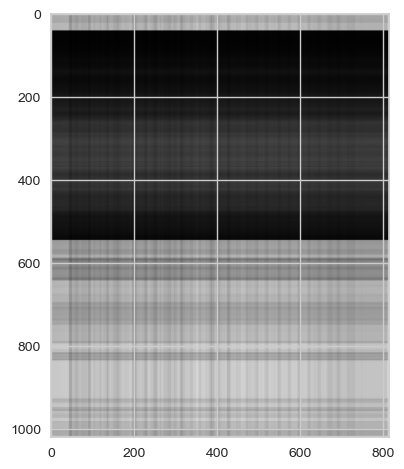

In [64]:
image_1_vec = U_vec[:, :1] @ np.diag(sigma[:1]) @ V_vec[:1, :]
plt.imshow(image_1_vec, cmap='gray');

### Using 10 vectors

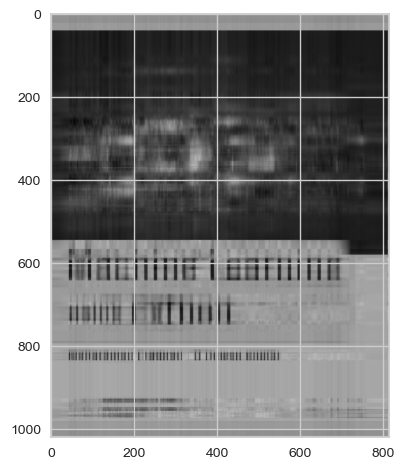

In [65]:
image_10_vec = U_vec[:, :10] @ np.diag(sigma[:10]) @ V_vec[:10, :]
plt.imshow(image_10_vec, cmap='gray');

### Using 50 vectors

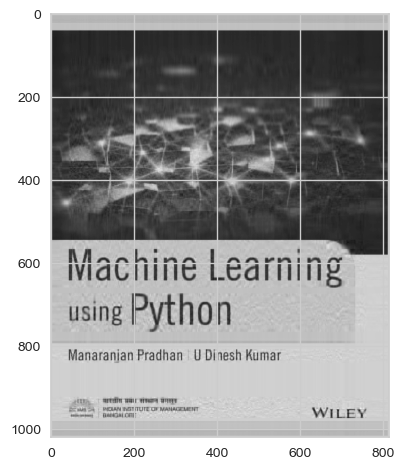

In [66]:
image_50_vec = U_vec[:, :50] @ np.diag(sigma[:50]) @ V_vec[:50, :]
plt.imshow(image_50_vec, cmap='gray');

In [67]:
sigma.shape

(814,)

## How much information is explained and how much is lost?

In [68]:
total_variance = np.sum( sigma )

In [69]:
np.round(sigma, 2)[0:10]

array([150783.67,  19684.62,  13846.15,   9944.42,   9388.48,   8918.55,
         8733.82,   7851.47,   7127.39,   6962.94])

In [70]:
np.round(sigma, 2)[-10:]

array([0.31, 0.3 , 0.29, 0.26, 0.23, 0.2 , 0.19, 0.  , 0.  , 0.  ])

In [71]:
var_explained = np.round([(eig_val/total_variance) for eig_val in sigma], 3)

In [72]:
var_explained_cumm = np.cumsum( var_explained )

In [73]:
var_explained_df = pd.DataFrame( {'component': range(1,275), 
                              'variance': var_explained[0:274],
                              'var_cumsum': var_explained_cumm[0:274]} )

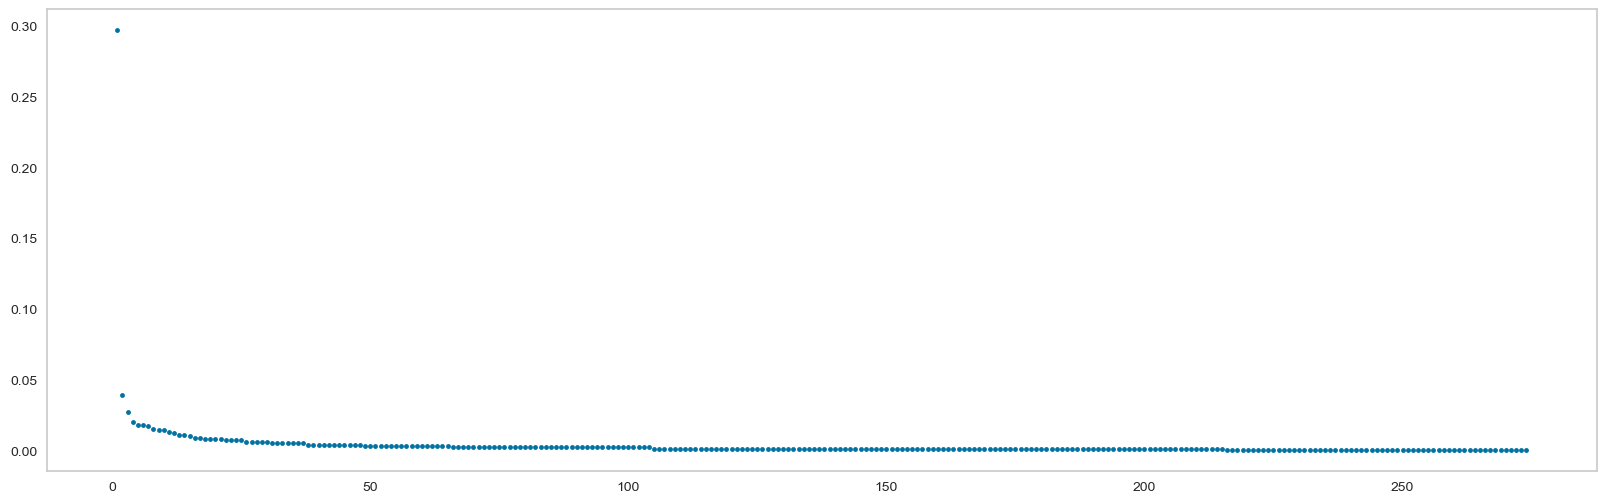

In [74]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.variance, 
         '.');

In [75]:
var_explained_df[0:20]

,component,variance,var_cumsum
0,1,0.297,0.297
1,2,0.039,0.336
2,3,0.027,0.363
3,4,0.020,0.383
4,5,0.018,0.401
5,6,0.018,0.419
6,7,0.017,0.436
7,8,0.015,0.451
8,9,0.014,0.465
9,10,0.014,0.479


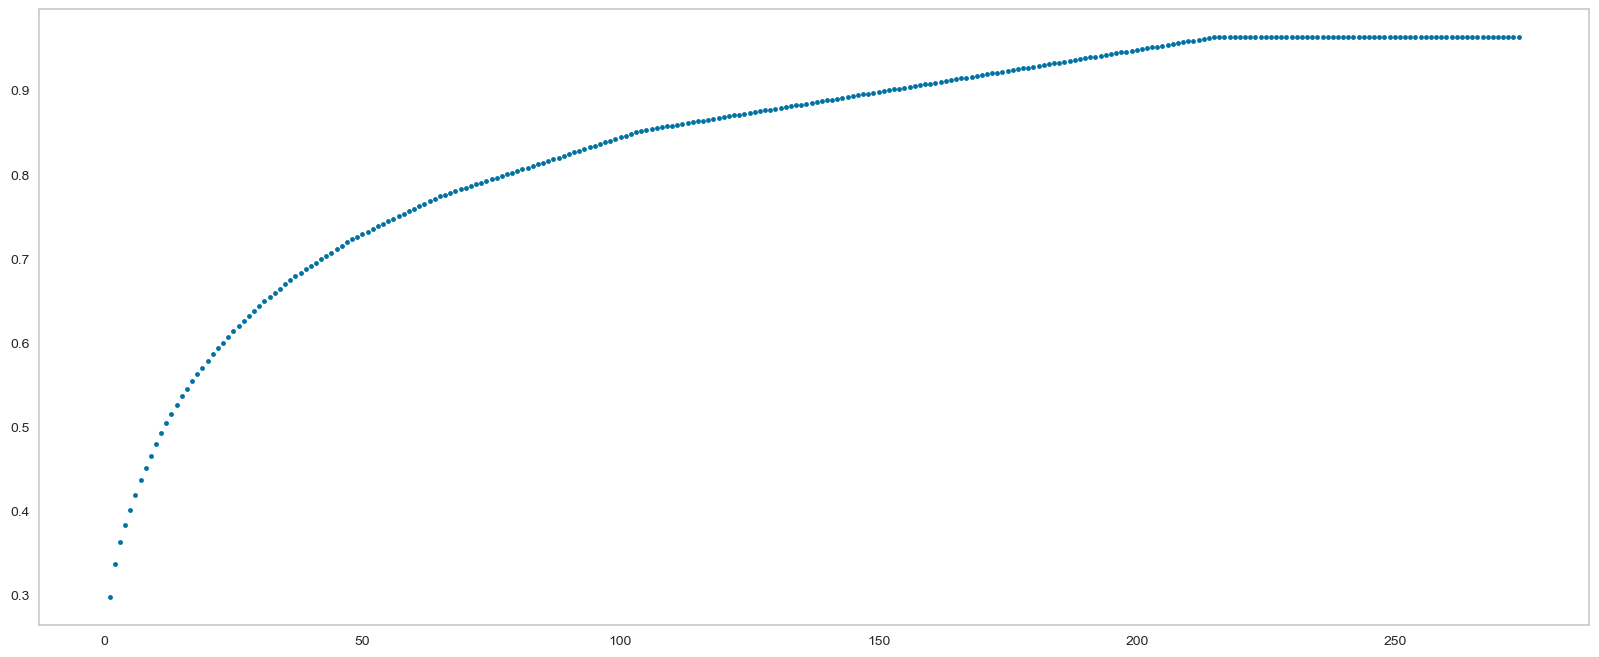

In [76]:
plt.figure(figsize = (20, 8))
plt.grid()
plt.plot(var_explained_df.component,
         var_explained_df.var_cumsum,
         '.');

## 7.8.4 Visualizing high dimensional datasets using PCA

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Load the dataset
url = "beer.csv"
beer_df = pd.read_csv(url)

In [78]:
beer_df.shape

(20, 5)

In [79]:
features = ['calories', 'sodium', 'alcohol', 'cost']

In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the dataset using Standard Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(beer_df[features])

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the selected features
pca.fit(x_scaled)

# Transform the data to the new 2D space
beer_2d = pca.transform(x_scaled)

# Create a DataFrame of the transformed data of first two dimensions
beer_2d_df = pd.DataFrame(beer_2d, columns=['D1', 'D2'])

In [81]:
explained_variance = np.round(pca.explained_variance_ratio_, 2)
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.45 0.36]


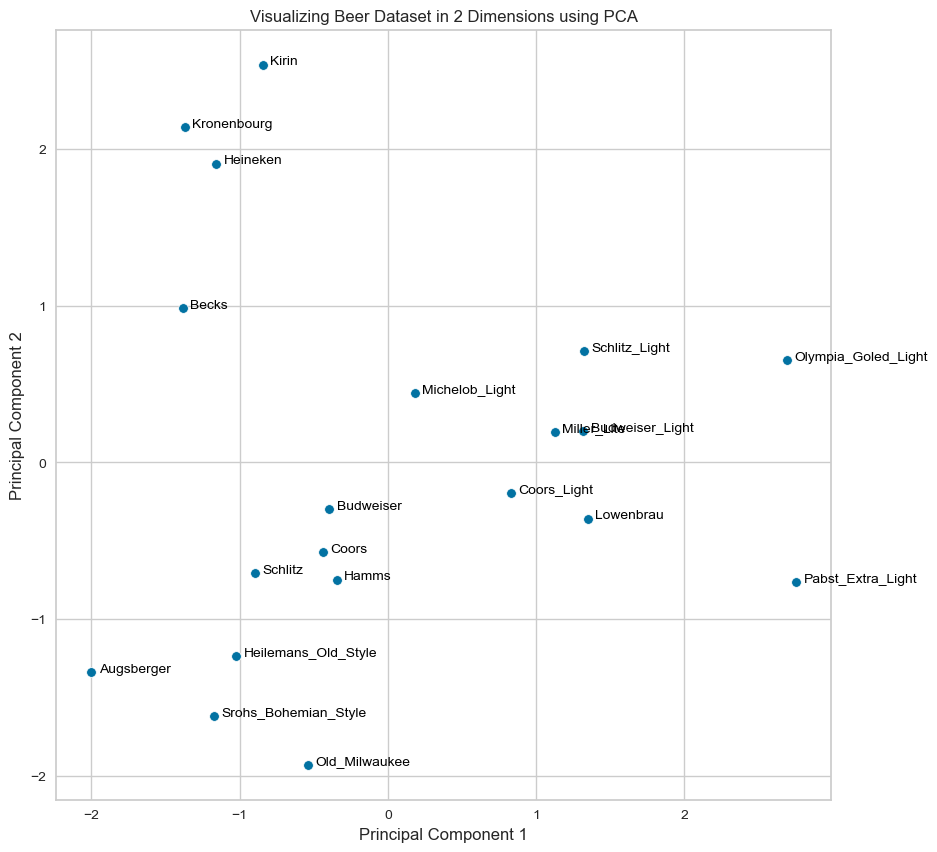

In [82]:
# Plotting the beer brands in 2D space
plt.figure(figsize=(10, 10))
sn.scatterplot(data=beer_2d_df, x='D1', y='D2')

# Adding annotations for each beer brand
for line in range(beer_df.shape[0]):
    plt.text(beer_2d_df.D1[line] + 0.05, 
             beer_2d_df.D2[line], 
             beer_df.name[line],
             horizontalalignment='left', 
             size='small', 
             color='black')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualizing Beer Dataset in 2 Dimensions using PCA')
plt.show();